In [ ]:
## uncomment these if you upload this on google drive and mount the drive
# from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# drive.mount('/content/gdrive', force_remount=True)

#### Q1. Loading Data 

Run the below cell to load CIFAR-10 train and test data. 
Answer the corresponding questions in the overleaf document

In [ ]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

\
## creating data loaders
batch_size = 4 ## set the batch size value 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print(train_data)
print(test_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


### Helper function 
To display images in the training set

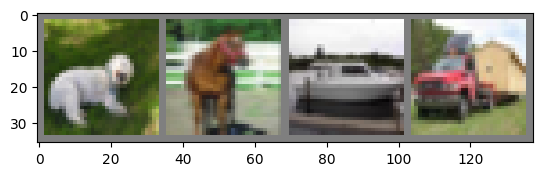

  dog horse  ship truck


In [ ]:
# function to display images in the training set 
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)


# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture 

In [ ]:
## Defining Classifier architecture 

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU 

In [ ]:
def plot_loss_curve(running_loss_list):
  plt.plot(running_loss_list)
  plt.title("Training Loss Curve")
  plt.xlabel("Minibatch No")
  plt.ylabel("Loss")
  plt.show()

[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.095
[1, 2000] loss: 2.037
[1, 2250] loss: 1.985
[1, 2500] loss: 1.950
[1, 2750] loss: 1.952
[1, 3000] loss: 1.864
[1, 3250] loss: 1.844
[1, 3500] loss: 1.792
[1, 3750] loss: 1.752
[1, 4000] loss: 1.762
[1, 4250] loss: 1.709
[1, 4500] loss: 1.718
[1, 4750] loss: 1.691
[1, 5000] loss: 1.683
[1, 5250] loss: 1.633
[1, 5500] loss: 1.668
[1, 5750] loss: 1.694
[1, 6000] loss: 1.646
[1, 6250] loss: 1.564
[1, 6500] loss: 1.600
[1, 6750] loss: 1.553
[1, 7000] loss: 1.555
[1, 7250] loss: 1.519
[1, 7500] loss: 1.527
[1, 7750] loss: 1.530
[1, 8000] loss: 1.506
[1, 8250] loss: 1.533
[1, 8500] loss: 1.494
[1, 8750] loss: 1.486
[1, 9000] loss: 1.533
[1, 9250] loss: 1.511
[1, 9500] loss: 1.477
[1, 9750] loss: 1.478
[1, 10000] loss: 1.400
[1, 10250] loss: 1.469
[1, 10500] loss: 1.457
[1, 10750] loss: 1.429
[1, 11000] loss: 1.418
[1, 11250] loss: 1.460
[1, 115

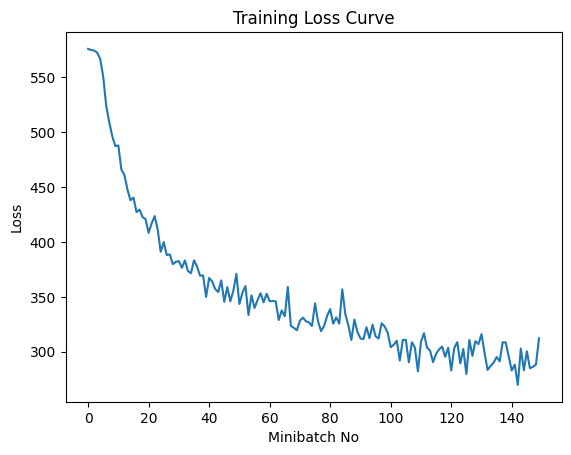

In [ ]:
## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net().cpu()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 3 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.cpu())
        loss = criterion(outputs, labels.cpu())
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
            
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

plot_loss_curve(running_loss_list)

(ii) Paste the above code in the code block below and modify it to use GPUs for training 


[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.096
[1, 2000] loss: 2.037
[1, 2250] loss: 1.984
[1, 2500] loss: 1.949
[1, 2750] loss: 1.952
[1, 3000] loss: 1.864
[1, 3250] loss: 1.841
[1, 3500] loss: 1.789
[1, 3750] loss: 1.752
[1, 4000] loss: 1.761
[1, 4250] loss: 1.711
[1, 4500] loss: 1.722
[1, 4750] loss: 1.688
[1, 5000] loss: 1.683
[1, 5250] loss: 1.636
[1, 5500] loss: 1.669
[1, 5750] loss: 1.696
[1, 6000] loss: 1.646
[1, 6250] loss: 1.572
[1, 6500] loss: 1.605
[1, 6750] loss: 1.552
[1, 7000] loss: 1.562
[1, 7250] loss: 1.514
[1, 7500] loss: 1.524
[1, 7750] loss: 1.525
[1, 8000] loss: 1.508
[1, 8250] loss: 1.540
[1, 8500] loss: 1.486
[1, 8750] loss: 1.484
[1, 9000] loss: 1.527
[1, 9250] loss: 1.509
[1, 9500] loss: 1.480
[1, 9750] loss: 1.481
[1, 10000] loss: 1.406
[1, 10250] loss: 1.471
[1, 10500] loss: 1.450
[1, 10750] loss: 1.430
[1, 11000] loss: 1.419
[1, 11250] loss: 1.463
[1, 115

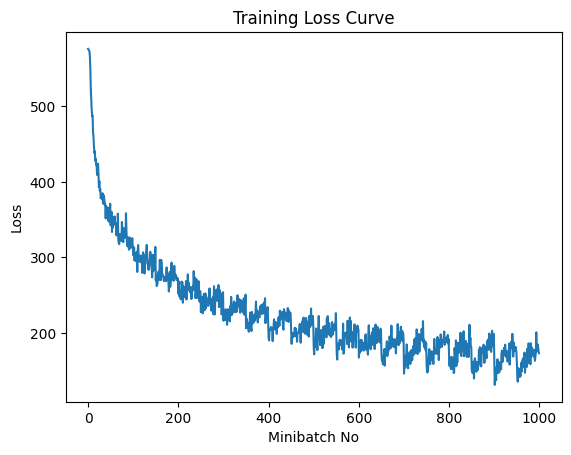

In [ ]:
## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net().cuda()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 20 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.cuda())
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
            
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)
plot_loss_curve(running_loss_list)

### Testing the network

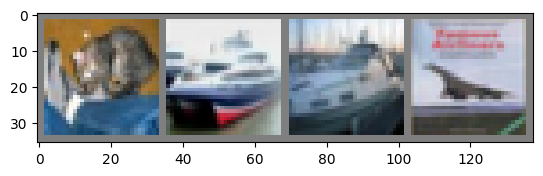

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship   car plane


In [ ]:
## displaying images from test set 
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting predicted label/class from the model output 
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))

(iv) Complete the code below to test the network on the entire testing set. 

In [ ]:

### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  = correct * 100/total
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 60 %


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set. 

In [ ]:
from threading import activeCount
def train(train_loader=train_loader, num_epochs=2, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
  """
  INPUTS 
  num_epochs: number of training epochs
  use_gpu: False by default. If true, load the model and data to GPU for training
  lr: learning rate for SGD optimizer
  momentum: momentum for SGD optimizer
  model_save_path: save path for the trained model 

  OUTPUTS
  returns running_loss_list: which stores the loss averaged over a minibatch of size 250
  """
  
  ## for reproducibility
  torch.manual_seed(7)
  np.random.seed(7)

  ## Instantiating classifier
  if use_gpu:
    net = Net().cuda()
  else:
    net = Net().cpu()

  ## Defining optimizer and loss function
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)


  ## Defining Training Parameters

  running_loss_list = [] # list to store running loss in the code below 
  for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
      # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data
      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      if use_gpu:
        outputs = net(inputs.cuda())
        loss = criterion(outputs, labels.cuda())
      else:
        outputs = net(inputs.cpu())
        loss = criterion(outputs, labels.cpu())
      loss.backward()
      optimizer.step()
      # print statistics
      if use_gpu:
        running_loss += loss.cuda().item()
      else:
        running_loss += loss.cpu().item()
      if i % 250 == 249:    # print every 250 mini-batches
        print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
        running_loss_list.append(running_loss)
        running_loss = 0.0
            
  print('Training Complete')
  PATH = model_save_path
  torch.save(net.state_dict(), PATH)
  plot_loss_curve(running_loss_list)
  return running_loss_list

def test(test_loader=test_loader, model_path='./net.pth'):

  ### complete the code to compute accuracy and store it as the variable acc
  ### Accuracy on whole data set
  net = Net()
  net.load_state_dict(torch.load(model_path))
  correct = 0
  total = 0
  with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
  acc  = correct * 100/total 
  print('Accuracy of the network on the 10000 test images: %d %%' % (acc))
  return acc

Results of  1
[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.095
[1, 2000] loss: 2.036
[1, 2250] loss: 1.986
[1, 2500] loss: 1.948
[1, 2750] loss: 1.952
[1, 3000] loss: 1.864
[1, 3250] loss: 1.845
[1, 3500] loss: 1.791
[1, 3750] loss: 1.752
[1, 4000] loss: 1.764
[1, 4250] loss: 1.708
[1, 4500] loss: 1.716
[1, 4750] loss: 1.693
[1, 5000] loss: 1.684
[1, 5250] loss: 1.632
[1, 5500] loss: 1.670
[1, 5750] loss: 1.701
[1, 6000] loss: 1.648
[1, 6250] loss: 1.573
[1, 6500] loss: 1.597
[1, 6750] loss: 1.552
[1, 7000] loss: 1.555
[1, 7250] loss: 1.526
[1, 7500] loss: 1.528
[1, 7750] loss: 1.535
[1, 8000] loss: 1.506
[1, 8250] loss: 1.536
[1, 8500] loss: 1.486
[1, 8750] loss: 1.497
[1, 9000] loss: 1.535
[1, 9250] loss: 1.516
[1, 9500] loss: 1.476
[1, 9750] loss: 1.480
[1, 10000] loss: 1.407
[1, 10250] loss: 1.481
[1, 10500] loss: 1.449
[1, 10750] loss: 1.427
[1, 11000] loss: 1.429
[1, 11250] loss:

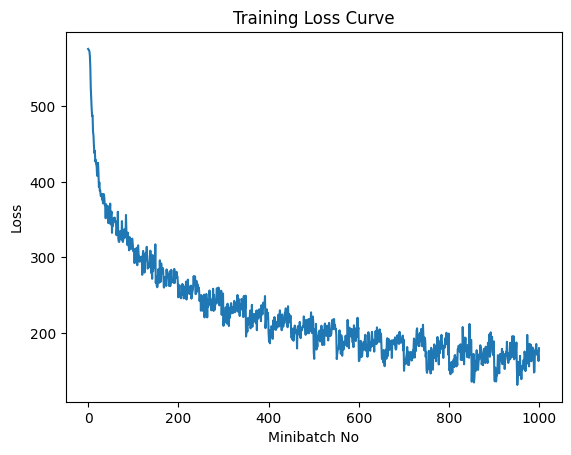

Accuracy of the network on the 10000 test images: 61 %
Results of  2
[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.095
[1, 2000] loss: 2.037
[1, 2250] loss: 1.984
[1, 2500] loss: 1.949
[1, 2750] loss: 1.953
[1, 3000] loss: 1.863
[1, 3250] loss: 1.842
[1, 3500] loss: 1.793
[1, 3750] loss: 1.753
[1, 4000] loss: 1.759
[1, 4250] loss: 1.712
[1, 4500] loss: 1.717
[1, 4750] loss: 1.688
[1, 5000] loss: 1.683
[1, 5250] loss: 1.638
[1, 5500] loss: 1.670
[1, 5750] loss: 1.702
[1, 6000] loss: 1.651
[1, 6250] loss: 1.574
[1, 6500] loss: 1.601
[1, 6750] loss: 1.546
[1, 7000] loss: 1.561
[1, 7250] loss: 1.522
[1, 7500] loss: 1.533
[1, 7750] loss: 1.532
[1, 8000] loss: 1.507
[1, 8250] loss: 1.541
[1, 8500] loss: 1.492
[1, 8750] loss: 1.495
[1, 9000] loss: 1.537
[1, 9250] loss: 1.512
[1, 9500] loss: 1.478
[1, 9750] loss: 1.477
[1, 10000] loss: 1.404
[1, 10250] loss: 1.472
[1, 10500] loss: 1.451
[1, 107

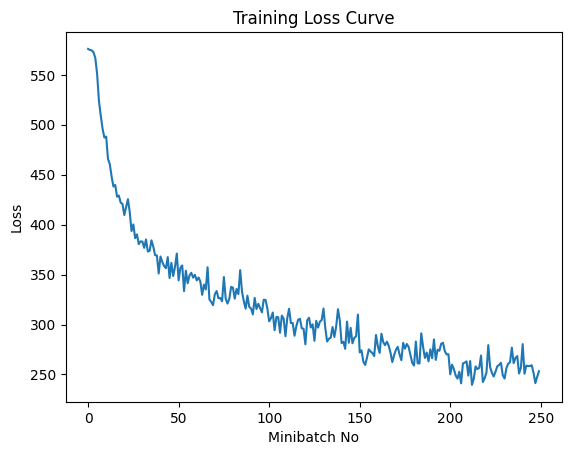

Accuracy of the network on the 10000 test images: 60 %
Results of  3
[1, 250] loss: 2.303
[1, 500] loss: 2.300
[1, 750] loss: 2.297
[1, 1000] loss: 2.286
[1, 1250] loss: 2.252
[1, 1500] loss: 2.150
[1, 1750] loss: 2.020
[1, 2000] loss: 1.959
[1, 2250] loss: 1.896
[1, 2500] loss: 1.838
[1, 2750] loss: 1.787
[1, 3000] loss: 1.728
[2, 250] loss: 1.693
[2, 500] loss: 1.657
[2, 750] loss: 1.641
[2, 1000] loss: 1.594
[2, 1250] loss: 1.583
[2, 1500] loss: 1.539
[2, 1750] loss: 1.543
[2, 2000] loss: 1.548
[2, 2250] loss: 1.534
[2, 2500] loss: 1.516
[2, 2750] loss: 1.483
[2, 3000] loss: 1.487
[3, 250] loss: 1.449
[3, 500] loss: 1.448
[3, 750] loss: 1.448
[3, 1000] loss: 1.398
[3, 1250] loss: 1.409
[3, 1500] loss: 1.384
[3, 1750] loss: 1.376
[3, 2000] loss: 1.398
[3, 2250] loss: 1.368
[3, 2500] loss: 1.384
[3, 2750] loss: 1.350
[3, 3000] loss: 1.346
[4, 250] loss: 1.310
[4, 500] loss: 1.303
[4, 750] loss: 1.314
[4, 1000] loss: 1.344
[4, 1250] loss: 1.286
[4, 1500] loss: 1.289
[4, 1750] loss: 1.2

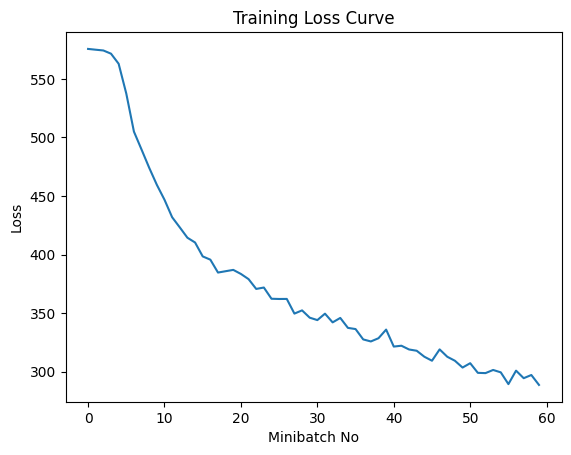

Accuracy of the network on the 10000 test images: 58 %
Results of  4
[1, 250] loss: 2.303
[1, 500] loss: 2.300
[1, 750] loss: 2.297
[1, 1000] loss: 2.286
[1, 1250] loss: 2.252
[1, 1500] loss: 2.150
[1, 1750] loss: 2.020
[1, 2000] loss: 1.958
[1, 2250] loss: 1.897
[1, 2500] loss: 1.838
[1, 2750] loss: 1.787
[1, 3000] loss: 1.726
[2, 250] loss: 1.692
[2, 500] loss: 1.656
[2, 750] loss: 1.639
[2, 1000] loss: 1.593
[2, 1250] loss: 1.582
[2, 1500] loss: 1.537
[2, 1750] loss: 1.540
[2, 2000] loss: 1.546
[2, 2250] loss: 1.533
[2, 2500] loss: 1.512
[2, 2750] loss: 1.480
[2, 3000] loss: 1.486
[3, 250] loss: 1.446
[3, 500] loss: 1.450
[3, 750] loss: 1.449
[3, 1000] loss: 1.399
[3, 1250] loss: 1.410
[3, 1500] loss: 1.383
[3, 1750] loss: 1.376
[3, 2000] loss: 1.395
[3, 2250] loss: 1.367
[3, 2500] loss: 1.381
[3, 2750] loss: 1.346
[3, 3000] loss: 1.344
[4, 250] loss: 1.311
[4, 500] loss: 1.302
[4, 750] loss: 1.314
[4, 1000] loss: 1.344
[4, 1250] loss: 1.285
[4, 1500] loss: 1.289
[4, 1750] loss: 1.2

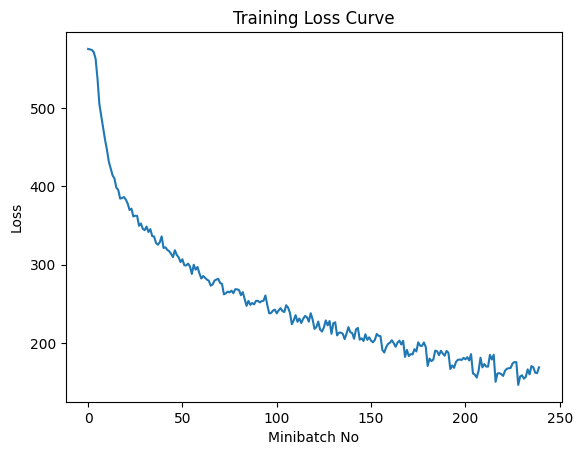

Accuracy of the network on the 10000 test images: 64 %


In [ ]:
param_list = [(4,20),(4,5),(16,5),(16,20)]

for i in range(len(param_list)):
  print("Results of ",i+1)
  batch_size,num_epochs = param_list[i] 
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)
  train(train_loader=train_loader, num_epochs=num_epochs, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth')
  test(test_loader=test_loader, model_path='./net.pth')